# Project 1: Data Wrangling
## By Louise Ritchie

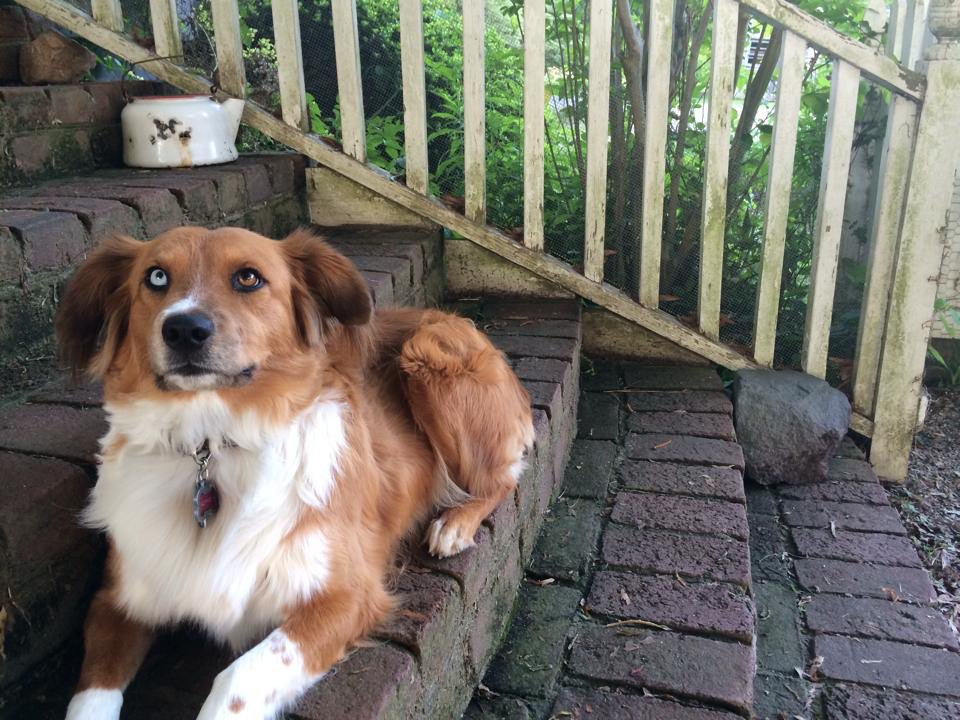

In [1]:
import pandas as pd
import requests
import tweepy
import json
import numpy as np
from functools import reduce

## 1. Gather Data 
<a id ='gather'></a>

**Twitter Archive** 


In [2]:
# read csv file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# check it has loaded ok
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Image Predictions

In [4]:
# download file programatically
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
r.status_code

200

In [5]:
# open file and write content
with open('image-predictions.tsv', mode='wb') as file:
    file.write(r.content)
    

In [6]:
#read file into df
image_predictions = pd.read_csv('image-predictions.tsv', sep ='\t')

In [7]:
# check file had loaded into df
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


** Note you can put an url directly into pandas read_csv, however project states to use requests library **

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'


df = pd.read_csv(url, sep = '\t')

**Twitter API**


In [8]:
# add in twitter keys etc (hidden for submission)
consumer_key = "HIDDEN"
consumer_secret = "HIDDEN"
access_token = "HIDDEN"
access_secret = "HIDDEN"


In [9]:
# access twitter API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [10]:
# write tweets to txt file and add errors to dictionary to keep track of them
del_tweets = {}
tweets_ids = twitter_archive.tweet_id.values 
count =0
with open('tweet_json.txt', 'w') as output:
    for tweet_id in tweets_ids:
        count += 1
        print(count,': ', tweet_id)
        try:
            tweet = api.get_status(tweet_id, tweet_mode ='extended')
            print('Success')
            json.dump(tweet._json, output)
            output.write('\n')
        except tweepy.TweepError as e:
            del_tweets[tweet_id]= e           


1 :  892420643555336193
Success
2 :  892177421306343426
Success
3 :  891815181378084864
Success
4 :  891689557279858688
Success
5 :  891327558926688256
Success
6 :  891087950875897856
Success
7 :  890971913173991426
Success
8 :  890729181411237888
Success
9 :  890609185150312448
Success
10 :  890240255349198849
Success
11 :  890006608113172480
Success
12 :  889880896479866881
Success
13 :  889665388333682689
Success
14 :  889638837579907072
Success
15 :  889531135344209921
Success
16 :  889278841981685760
Success
17 :  888917238123831296
Success
18 :  888804989199671297
Success
19 :  888554962724278272
Success
20 :  888202515573088257
21 :  888078434458587136
Success
22 :  887705289381826560
Success
23 :  887517139158093824
Success
24 :  887473957103951883
Success
25 :  887343217045368832
Success
26 :  887101392804085760
Success
27 :  886983233522544640
Success
28 :  886736880519319552
Success
29 :  886680336477933568
Success
30 :  886366144734445568
Success
31 :  886267009285017600
Su

Success
248 :  845459076796616705
249 :  845397057150107648
Success
250 :  845306882940190720
Success
251 :  845098359547420673
Success
252 :  844979544864018432
Success
253 :  844973813909606400
Success
254 :  844704788403113984
255 :  844580511645339650
Success
256 :  844223788422217728
Success
257 :  843981021012017153
Success
258 :  843856843873095681
Success
259 :  843604394117681152
Success
260 :  843235543001513987
Success
261 :  842892208864923648
262 :  842846295480000512
Success
263 :  842765311967449089
Success
264 :  842535590457499648
Success
265 :  842163532590374912
Success
266 :  842115215311396866
Success
267 :  841833993020538882
Success
268 :  841680585030541313
Success
269 :  841439858740625411
Success
270 :  841320156043304961
Success
271 :  841314665196081154
Success
272 :  841077006473256960
Success
273 :  840761248237133825
Success
274 :  840728873075638272
Success
275 :  840698636975636481
Success
276 :  840696689258311684
Success
277 :  840632337062862849
Succ

Success
491 :  813812741911748608
Success
492 :  813800681631023104
Success
493 :  813217897535406080
Success
494 :  813202720496779264
Success
495 :  813187593374461952
Success
496 :  813172488309972993
Success
497 :  813157409116065792
Success
498 :  813142292504645637
Success
499 :  813130366689148928
Success
500 :  813127251579564032
Success
501 :  813112105746448384
Success
502 :  813096984823349248
Success
503 :  813081950185472002
Success
504 :  813066809284972545
Success
505 :  813051746834595840
Success
506 :  812781120811126785
Success
507 :  812747805718642688
508 :  812709060537683968
Success
509 :  812503143955202048
Success
510 :  812466873996607488
Success
511 :  812372279581671427
Success
512 :  811985624773361665
Success
513 :  811744202451197953
Success
514 :  811647686436880384
Success
515 :  811627233043480576
Success
516 :  811386762094317568
Success
517 :  810984652412424192
Success
518 :  810896069567610880
Success
519 :  810657578271330305
Success
520 :  8102844

Success
733 :  781524693396357120
Success
734 :  781308096455073793
Success
735 :  781251288990355457
Success
736 :  781163403222056960
Success
737 :  780931614150983680
Success
738 :  780858289093574656
Success
739 :  780800785462489090
Success
740 :  780601303617732608
Success
741 :  780543529827336192
Success
742 :  780496263422808064
Success
743 :  780476555013349377
Success
744 :  780459368902959104
Success
745 :  780192070812196864
Success
746 :  780092040432480260
Success
747 :  780074436359819264
Success
748 :  779834332596887552
Success
749 :  779377524342161408
Success
750 :  779124354206535695
Success
751 :  779123168116150273
752 :  779056095788752897
Success
753 :  778990705243029504
Success
754 :  778774459159379968
Success
755 :  778764940568104960
Success
756 :  778748913645780993
Success
757 :  778650543019483137
Success
758 :  778624900596654080
Success
759 :  778408200802557953
Success
760 :  778396591732486144
Success
761 :  778383385161035776
Success
762 :  7782868

Rate limit reached. Sleeping for: 659


Success
902 :  758474966123810816
Success
903 :  758467244762497024
Success
904 :  758405701903519748
Success
905 :  758355060040593408
Success
906 :  758099635764359168
Success
907 :  758041019896193024
Success
908 :  757741869644341248
Success
909 :  757729163776290825
Success
910 :  757725642876129280
Success
911 :  757611664640446465
Success
912 :  757597904299253760
Success
913 :  757596066325864448
Success
914 :  757400162377592832
Success
915 :  757393109802180609
Success
916 :  757354760399941633
Success
917 :  756998049151549440
Success
918 :  756939218950160384
Success
919 :  756651752796094464
Success
920 :  756526248105566208
Success
921 :  756303284449767430
Success
922 :  756288534030475264
Success
923 :  756275833623502848
Success
924 :  755955933503782912
Success
925 :  755206590534418437
Success
926 :  755110668769038337
Success
927 :  754874841593970688
Success
928 :  754856583969079297
Success
929 :  754747087846248448
Success
930 :  754482103782404096
Success
931 : 

Success
1140 :  728015554473250816
Success
1141 :  727685679342333952
Success
1142 :  727644517743104000
Success
1143 :  727524757080539137
Success
1144 :  727314416056803329
Success
1145 :  727286334147182592
Success
1146 :  727175381690781696
Success
1147 :  727155742655025152
Success
1148 :  726935089318363137
Success
1149 :  726887082820554753
Success
1150 :  726828223124897792
Success
1151 :  726224900189511680
Success
1152 :  725842289046749185
Success
1153 :  725786712245440512
Success
1154 :  725729321944506368
Success
1155 :  725458796924002305
Success
1156 :  724983749226668032
Success
1157 :  724771698126512129
Success
1158 :  724405726123311104
Success
1159 :  724049859469295616
Success
1160 :  724046343203856385
Success
1161 :  724004602748780546
Success
1162 :  723912936180330496
Success
1163 :  723688335806480385
Success
1164 :  723673163800948736
Success
1165 :  723179728551723008
Success
1166 :  722974582966214656
Success
1167 :  722613351520608256
Success
1168 :  7215

Success
1375 :  701952816642965504
Success
1376 :  701889187134500865
Success
1377 :  701805642395348998
Success
1378 :  701601587219795968
Success
1379 :  701570477911896070
Success
1380 :  701545186879471618
Success
1381 :  701214700881756160
Success
1382 :  700890391244103680
Success
1383 :  700864154249383937
Success
1384 :  700847567345688576
Success
1385 :  700796979434098688
Success
1386 :  700747788515020802
Success
1387 :  700518061187723268
Success
1388 :  700505138482569216
Success
1389 :  700462010979500032
Success
1390 :  700167517596164096
Success
1391 :  700151421916807169
Success
1392 :  700143752053182464
Success
1393 :  700062718104104960
Success
1394 :  700029284593901568
Success
1395 :  700002074055016451
Success
1396 :  699801817392291840
Success
1397 :  699788877217865730
Success
1398 :  699779630832685056
Success
1399 :  699775878809702401
Success
1400 :  699691744225525762
Success
1401 :  699446877801091073
Success
1402 :  699434518667751424
Success
1403 :  6994

Success
1610 :  685547936038666240
Success
1611 :  685532292383666176
Success
1612 :  685325112850124800
Success
1613 :  685321586178670592
Success
1614 :  685315239903100929
Success
1615 :  685307451701334016
Success
1616 :  685268753634967552
Success
1617 :  685198997565345792
Success
1618 :  685169283572338688
Success
1619 :  684969860808454144
Success
1620 :  684959798585110529
Success
1621 :  684940049151070208
Success
1622 :  684926975086034944
Success
1623 :  684914660081053696
Success
1624 :  684902183876321280
Success
1625 :  684880619965411328
Success
1626 :  684830982659280897
Success
1627 :  684800227459624960
Success
1628 :  684594889858887680
Success
1629 :  684588130326986752
Success
1630 :  684567543613382656
Success
1631 :  684538444857667585
Success
1632 :  684481074559381504
Success
1633 :  684460069371654144
Success
1634 :  684241637099323392
Success
1635 :  684225744407494656
Success
1636 :  684222868335505415
Success
1637 :  684200372118904832
Success
1638 :  6841

Rate limit reached. Sleeping for: 651


Success
1802 :  676957860086095872
Success
1803 :  676949632774234114
Success
1804 :  676948236477857792
Success
1805 :  676946864479084545
Success
1806 :  676942428000112642
Success
1807 :  676936541936185344
Success
1808 :  676916996760600576
Success
1809 :  676897532954456065
Success
1810 :  676864501615042560
Success
1811 :  676821958043033607
Success
1812 :  676819651066732545
Success
1813 :  676811746707918848
Success
1814 :  676776431406465024
Success
1815 :  676617503762681856
Success
1816 :  676613908052996102
Success
1817 :  676606785097199616
Success
1818 :  676603393314578432
Success
1819 :  676593408224403456
Success
1820 :  676590572941893632
Success
1821 :  676588346097852417
Success
1822 :  676582956622721024
Success
1823 :  676575501977128964
Success
1824 :  676533798876651520
Success
1825 :  676496375194980353
Success
1826 :  676470639084101634
Success
1827 :  676440007570247681
Success
1828 :  676430933382295552
Success
1829 :  676263575653122048
Success
1830 :  6762

Success
2037 :  671729906628341761
Success
2038 :  671561002136281088
Success
2039 :  671550332464455680
Success
2040 :  671547767500775424
Success
2041 :  671544874165002241
Success
2042 :  671542985629241344
Success
2043 :  671538301157904385
Success
2044 :  671536543010570240
Success
2045 :  671533943490011136
Success
2046 :  671528761649688577
Success
2047 :  671520732782923777
Success
2048 :  671518598289059840
Success
2049 :  671511350426865664
Success
2050 :  671504605491109889
Success
2051 :  671497587707535361
Success
2052 :  671488513339211776
Success
2053 :  671486386088865792
Success
2054 :  671485057807351808
Success
2055 :  671390180817915904
Success
2056 :  671362598324076544
Success
2057 :  671357843010908160
Success
2058 :  671355857343524864
Success
2059 :  671347597085433856
Success
2060 :  671186162933985280
Success
2061 :  671182547775299584
Success
2062 :  671166507850801152
Success
2063 :  671163268581498880
Success
2064 :  671159727754231808
Success
2065 :  6711

Success
2272 :  667495797102141441
Success
2273 :  667491009379606528
Success
2274 :  667470559035432960
Success
2275 :  667455448082227200
Success
2276 :  667453023279554560
Success
2277 :  667443425659232256
Success
2278 :  667437278097252352
Success
2279 :  667435689202614272
Success
2280 :  667405339315146752
Success
2281 :  667393430834667520
Success
2282 :  667369227918143488
Success
2283 :  667211855547486208
Success
2284 :  667200525029539841
Success
2285 :  667192066997374976
Success
2286 :  667188689915760640
Success
2287 :  667182792070062081
Success
2288 :  667177989038297088
Success
2289 :  667176164155375616
Success
2290 :  667174963120574464
Success
2291 :  667171260800061440
Success
2292 :  667165590075940865
Success
2293 :  667160273090932737
Success
2294 :  667152164079423490
Success
2295 :  667138269671505920
Success
2296 :  667119796878725120
Success
2297 :  667090893657276420
Success
2298 :  667073648344346624
Success
2299 :  667070482143944705
Success
2300 :  6670

In [11]:
# view tweets not accessed
del_tweets

{888202515573088257: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 873697596434513921: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 872668790621863937: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 872261713294495745: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 869988702071779329: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 866816280283807744: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 861769973181624320: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 856602993587888130: tweepy.error.TweepError([{'code': 144,
  

In [12]:
# take the JSON data we need and add to df
info = []
with open('tweet_json.txt') as j_file:
    for line in j_file:
        data = json.loads(line)
        tweet_id = data['id']
        retweet_count = data['retweet_count']
        fav_count = data['favorite_count']
        
        info.append([tweet_id, retweet_count, fav_count])

json_tweet = pd.DataFrame(info, columns = ['tweet_id', 'retweet_count', 'fav_count'])
   

In [13]:
# check it has loaded
json_tweet

,tweet_id,retweet_count,fav_count
0,892420643555336193,7445,35291
1,892177421306343426,5533,30532
2,891815181378084864,3656,22966
3,891689557279858688,7620,38570
4,891327558926688256,8209,36854
...,...,...,...
2326,666049248165822465,39,95
2327,666044226329800704,123,263
2328,666033412701032449,39,108
2329,666029285002620928,41,118


## 2. Assess and Clean Data

Objective is to find at least 8 quality issues and 2 tidiness issues. These are listed below. For each step the data is assessed then cleaned and checked. 

### Quality
1\. timestamp and retweeted_status_timestamp are objects not dates. change these to dates.  
2\. name, doggo, floofer, pupper, puppo contain None... replace to NaN  
4\. remove url from source, just have categories.  
5\. Update type of source to category  
6\. remove retweets, only want original tweets  
7\. erronous data type - tweet_id  
8\. numerator and denomintar values different from text  
8\. ratings columns rather than 2 separate columns of denominator and numerator     
9\. there are incorrect names   
10\. tidy up the predictions columns there are 3 when we only need 1, take only the predictions which are dogs    
11\. tidy breed column to lowercase and remove _  
  
### Tidiness
3\. The stage categories should be in one column as they are one variable    
12\. Merge dfs     

In [14]:
# take copies of all dfs
archive_clean = twitter_archive.copy()
j_tweet_clean =json_tweet.copy()
i_pred_clean =image_predictions.copy()

In [15]:
archive_clean.name.isna().sum()

0

#### 1. timestamp and retweeted_status_timestamp are objects not dates. change these to dates.. 

define:
There are erronous datatypes - timestamp and retweeted_status_timestamp are objects where they should be dates. 

In [16]:
# check data types of df
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

code:

In [17]:
# change timestamp columns to correct type
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)
archive_clean.retweeted_status_timestamp = pd.to_datetime(archive_clean.retweeted_status_timestamp)

test:

In [18]:
# check they are the correct data typess
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

#### 2. The columns name, doggo, floofer, pupper, puppo all contain 'None' values, we need to change these to NaN 

define:
There are 'None' values in various columns (doggo, floofer, pupper, puppo, name). These need to be changed to NaN

In [19]:
# what columns have 'None' values
archive_clean.eq('None').any()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


tweet_id                      False
in_reply_to_status_id         False
in_reply_to_user_id           False
timestamp                     False
source                        False
text                          False
retweeted_status_id           False
retweeted_status_user_id      False
retweeted_status_timestamp    False
expanded_urls                 False
rating_numerator              False
rating_denominator            False
name                           True
doggo                          True
floofer                        True
pupper                         True
puppo                          True
dtype: bool

code:

In [20]:
# replace none values with NaN
archive_clean.replace('None', np.nan, inplace=True)

test:

In [21]:
# check there are no 'None' values
archive_clean.eq('None').any()

tweet_id                      False
in_reply_to_status_id         False
in_reply_to_user_id           False
timestamp                     False
source                        False
text                          False
retweeted_status_id           False
retweeted_status_user_id      False
retweeted_status_timestamp    False
expanded_urls                 False
rating_numerator              False
rating_denominator            False
name                          False
doggo                         False
floofer                       False
pupper                        False
puppo                         False
dtype: bool

#### 3. The stage categories should be in one column as they are one variable

define: 
The stage categories are one variable and should be in the one column rather than several. If a tweet contains multiple categories, bring them together into one variable.

In [22]:
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

we want to check that we have the same count of 'doggo' etc after we have done the cleaning

In [23]:
archive_clean.doggo.value_counts()

doggo    97
Name: doggo, dtype: int64

In [24]:
archive_clean.floofer.value_counts()

floofer    10
Name: floofer, dtype: int64

In [25]:
archive_clean.pupper.value_counts()

pupper    257
Name: pupper, dtype: int64

In [26]:
archive_clean.puppo.value_counts()

puppo    30
Name: puppo, dtype: int64

code:

In [27]:
# put the 4 columns into one. there are some with multiple categories so concat them together
cols = ['doggo', 'floofer', 'pupper', 'puppo']
archive_clean['stage_category'] = archive_clean[cols].apply(lambda x: x.str.cat(sep='-'),axis=1)

test:

In [28]:
# check values add up to previous ones
archive_clean.stage_category.value_counts()

                 1976
pupper            245
doggo              83
puppo              29
doggo-pupper       12
floofer             9
doggo-puppo         1
doggo-floofer       1
Name: stage_category, dtype: int64

In [29]:
archive_clean = archive_clean.drop(cols, axis=1)

#### 4. remove url from source, just have categories.

define: 
the source columns contains urls which we do not need, remove the urls

In [30]:
# check a random sample of the df, we can see source also contains the url, we only need categories.
archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage_category
26,886983233522544640,NaN,NaN,2017-07-17 16:17:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Maya. She's very shy. Rarely leaves he...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/886983233...,13,10,Maya,
2024,671891728106971137,NaN,NaN,2015-12-02 03:20:45+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Mojo. Apparently he's too cute for a s...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/671891728...,11,10,Mojo,
1726,680055455951884288,NaN,NaN,2015-12-24 16:00:30+00:00,"<a href=""https://about.twitter.com/products/tw...","Meet Sammy. At first I was like ""that's a snow...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/680055455...,10,10,Sammy,
2228,668256321989451776,NaN,NaN,2015-11-22 02:34:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Jareld. Jareld rules these waters. Lad...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/668256321...,13,10,Jareld,
1854,675534494439489536,NaN,NaN,2015-12-12 04:35:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Seriously guys?! Only send in dogs. I only rat...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/675534494...,11,10,a,


In [31]:
archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

code:

In [32]:
# create method to remove urls and have only categories
def update_source_values(value):
    if 'iPhone' in value:
        return 'Twitter for iPhone'
    elif 'Vine' in value:
        return 'Vine - Make a Scene'
    elif 'Twitter' in value:
        return 'Twitter Web Client'
    elif 'TweetDeck' in value:
        return 'TweetDeck'
    
# apply method to source column
archive_clean.source = archive_clean.source.apply(update_source_values)

test:

In [33]:
# check the new values
archive_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

#### 5. Update type of source to category

define: Erronous data types, as there are only 4 type of sources this should be type category rather than object.

code:

In [34]:
# we can see there are only 4 types of sources, change dtype to category
archive_clean.source = archive_clean.source.astype('category')

test:

In [35]:
# check datatype has changed
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   category           
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

#### 6. remove retweets and replies

define: 
we are only interested in orginal tweets, therefore retweets and replies can be removed by taking those values that contain NaN in the retweetd_status_id and in_reply_to_status_id columns

In [36]:
# check how many tweets are retweets
archive_clean.retweeted_status_id.count()

181

In [37]:
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'stage_category'],
      dtype='object')

In [38]:
# count how many are original tweets
archive_clean['retweeted_status_id'].isna().count()

2356

code:

In [39]:
# remove retweets and replies by taking only NaN values
archive_clean = archive_clean.loc[archive_clean['retweeted_status_id'].isna()]
archive_clean = archive_clean.loc[archive_clean['in_reply_to_status_id'].isna()]

test:

In [40]:
# check numbers match the previous numbers above
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   category           
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

In [41]:
#drop all the columns relating to retweets/replies now as they only contain null values
archive_clean = archive_clean.drop(['retweeted_status_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 
                    'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)


In [42]:
# check cols have dropped
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'stage_category'],
      dtype='object')

#### 7. erronous data type - tweet_id

define: tweet_id should be a string and not an integer.

code:

In [43]:
# change tweet id to string
archive_clean['tweet_id']= archive_clean['tweet_id'].astype(str)
j_tweet_clean['tweet_id']= j_tweet_clean['tweet_id'].astype(str)
i_pred_clean['tweet_id']= i_pred_clean['tweet_id'].astype(str)

test:

In [44]:
# check for each df, tweet id is type string now
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   category           
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                1494 non-null   object             
 8   stage_category      2097 non-null   object             
dtypes: category(1), datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 149.7+ KB


In [45]:
j_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet_id       2331 non-null   object
 1   retweet_count  2331 non-null   int64 
 2   fav_count      2331 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


In [46]:
i_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### 8. ratings columns rather than 2 separate cols.

define: There is not a ratings columns, we can create one by dividing the numerator column by the denominator column.

In [47]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   category           
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                1494 non-null   object             
 8   stage_category      2097 non-null   object             
dtypes: category(1), datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 149.7+ KB


code:

In [48]:
# create rating column
archive_clean['rating'] = archive_clean['rating_numerator']/archive_clean['rating_denominator']

# drop numerator and denominator columns as no longer needed.
archive_clean = archive_clean.drop(['rating_numerator', 'rating_denominator'], axis=1)

test:

In [49]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'name',
       'stage_category', 'rating'],
      dtype='object')

#### 9. There are incorrect names - they are lower case letter like a, the etc whereas other names first letter is capitalised

define: the names column contains values that are not names they are all lowercase, so change these to NaN values

In [50]:
# show list of names
archive_clean.name.value_counts()

a           55
Lucy        11
Charlie     11
Cooper      10
Oliver      10
            ..
Tiger        1
Holly        1
Billl        1
Bluebert     1
Harry        1
Name: name, Length: 954, dtype: int64

In [51]:
# check how many null values before hand
archive_clean.name.isna().sum()

603

code:

In [52]:
# find all the lower case values
mask = archive_clean.name.str.contains('^[a-z]', regex=True, na=False)
archive_clean[mask].name.value_counts()

a               55
the              8
an               6
very             4
one              4
quite            3
just             3
actually         2
not              2
getting          2
my               1
life             1
infuriating      1
all              1
light            1
mad              1
incredibly       1
old              1
space            1
by               1
officially       1
this             1
such             1
unacceptable     1
his              1
Name: name, dtype: int64

In [53]:
# count them
archive_clean[mask].name.value_counts().sum()

104

In [54]:
# change values to null
archive_clean.loc[mask, 'name']= np.NaN

test:

In [55]:
# check we have the correct number of null values
archive_clean.name.isna().sum()

707

#### 10. tidy up the predictions columns there are 3 when we only need 1, take only the predictions which are dogs

define: there are several predictions columns which are not needed, we only need one which should be a dog.

In [56]:
# check cols
i_pred_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

code:

In [57]:
# take only cols that are dogs
conditions = [(i_pred_clean.p1_dog == True),
              (i_pred_clean.p2_dog == True),
              (i_pred_clean.p3_dog == True)
             ]
breed = [i_pred_clean.p1, i_pred_clean.p2, i_pred_clean.p3]
conf = [i_pred_clean.p1_conf, i_pred_clean.p2_conf, i_pred_clean.p3_conf]

i_pred_clean['breed'] = np.select(conditions, breed, default = np.NaN)
i_pred_clean['confidence'] = np.select(conditions, conf, default = np.NaN)

In [58]:
#drop the columns we no longer need
drop_cols = ['p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']
i_pred_clean = i_pred_clean.drop(drop_cols, axis=1)

test:

In [59]:
i_pred_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'breed', 'confidence'], dtype='object')

In [60]:
# check if any duplicates
i_pred_clean.duplicated(subset='tweet_id').sum()

0

#### note this is not a tidiness issue

####  remove columns no longer needed

As there are no duplicated tweets, we can remove the img_num and the jpg_url can also be removed as we will not need them for analysis

In [61]:
i_pred_clean = i_pred_clean.drop(['img_num','jpg_url'], axis=1)

In [62]:
i_pred_clean.columns

Index(['tweet_id', 'breed', 'confidence'], dtype='object')

#### 11. tidy breed column to lowercase and remove _

define: the breed column is inconsistent, put it to lowercase and replace _ with a space

code:

In [63]:
# as seen from above the breed col isn't consistent.
i_pred_clean.breed = i_pred_clean.breed.str.lower()
i_pred_clean.breed = i_pred_clean.breed.str.replace('_', ' ')

test:

In [64]:
# check values are correct
i_pred_clean.sample(10)

,tweet_id,breed,confidence
423,674053186244734976,cardigan,0.984725
525,676606785097199616,malinois,0.142300
1681,813812741911748608,french bulldog,0.709146
1442,775364825476165632,beagle,0.571229
1794,831309418084069378,doberman,0.369389
2049,887101392804085760,samoyed,0.733942
1947,862722525377298433,basset,0.393330
548,677334615166730240,lakeland terrier,0.859392
114,667924896115245057,labrador retriever,0.209051
1258,748692773788876800,NaN,NaN


#### 12. Merge dfs - to be in a tidy format, the 3 dfs can be merged into 1


define: there does not need to be 3 dataframes, they can all be put into one by using tweet_id

code:

In [65]:
# merge all 3 dfs into 1
dfs = [archive_clean, j_tweet_clean, i_pred_clean]
twitter_archive_master = reduce(lambda  left,right: pd.merge(left,right,on=['tweet_id']), dfs)
# twitter_archive_master = archive_clean.merge(j_tweet_clean,on=['tweet_id'])

test:

In [66]:
# check merge was succesful
twitter_archive_master

,tweet_id,timestamp,source,text,expanded_urls,name,stage_category,rating,retweet_count,fav_count,breed,confidence
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,,1.3,7445,35291,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,,1.3,5533,30532,chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,,1.2,3656,22966,chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,,1.3,7620,38570,labrador retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,,1.2,8209,36854,basset,0.555712
...,...,...,...,...,...,...,...,...,...,...,...,...
1959,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,NaN,,0.5,39,95,miniature pinscher,0.560311
1960,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,NaN,,0.6,123,263,rhodesian ridgeback,0.408143
1961,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,NaN,,0.9,39,108,german shepherd,0.596461
1962,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,NaN,,0.7,41,118,redbone,0.506826


## Storing, Analysing and Visualising Data

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

Store the final dataset to csv

In [68]:
# save to csv
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

#### 1. What is the top 10 highest rated dog on average?

In [69]:
# find on average the highest rated breed
highest_rated = twitter_archive_master.groupby('breed').mean().sort_values(by='rating',ascending=False)['rating'][:10]
highest_rated

breed
clumber                 2.700000
bouvier des flandres    1.300000
pomeranian              1.253659
saluki                  1.250000
briard                  1.233333
tibetan mastiff         1.225000
border terrier          1.214286
standard schnauzer      1.200000
silky terrier           1.200000
gordon setter           1.175000
Name: rating, dtype: float64

Text(0.5, 0, 'Breed')

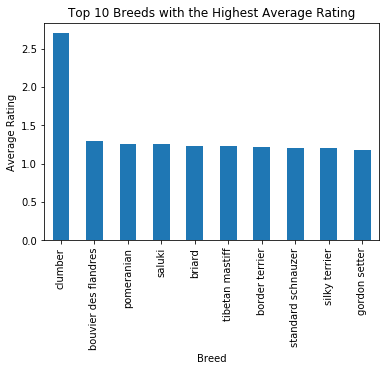

In [70]:
# plot the highest average rating by breed
twitter_archive_master.groupby('breed').mean().sort_values(by='rating',ascending=False)[:10]['rating'].plot(kind='bar')
plt.title('Top 10 Breeds with the Highest Average Rating')
plt.ylabel('Average Rating')
plt.xlabel('Breed')

As can be seen from the data above, Clumber has the highest average rating of the dogs that are on WeRateDogs, followed by Bouvier Des Flandres and Pomeranian. It is by far the highest rated dog with the other breeds closer toether. It is worth bearing in mind that values over 1 are where the numerator what higher than the denominator indicating a large rating.

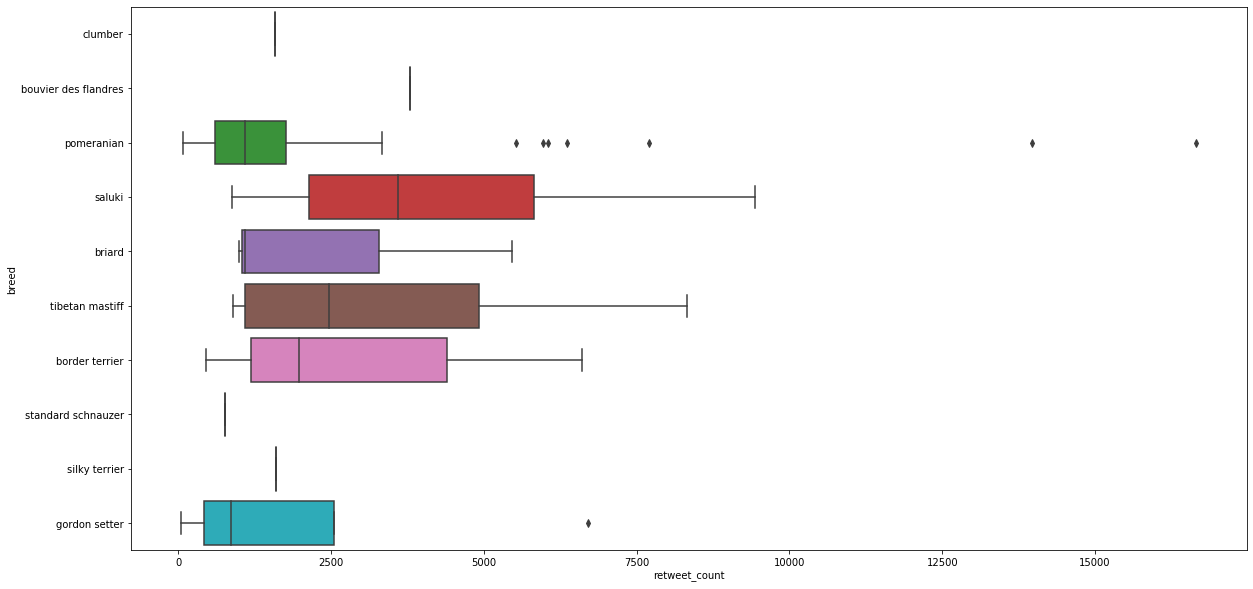

In [71]:
# plot the distribution of retweet count
plt.figure(figsize=(20,10))

list1 = highest_rated.index
sns.boxplot(y='breed', x='retweet_count', data=twitter_archive_master, order=list1)

We can see the distribution of the retweet count for the top 10 dogs with the highest average rating. It's interesting to see the pomeranian breed has a few tweets that have proved popular. The top 2 rated breeds appear to have less variation which could mean there are fewer tweets about them but the tweets that are there are high ratings. We can check this below

In [72]:
# breeds with number of tweets
twitter_archive_master.groupby('breed')['tweet_id'].count().sort_values(ascending=False)

breed
golden retriever        156
labrador retriever      104
pembroke                 94
chihuahua                90
pug                      62
                       ... 
standard schnauzer        1
silky terrier             1
bouvier des flandres      1
japanese spaniel          1
clumber                   1
Name: tweet_id, Length: 113, dtype: int64

As we can see there is only one entry for clumber so taking average rating may not have been the most accurate measure. The top 10 dog breeds by number of tweets can be seen below.

Text(0.5, 0, 'Breed')

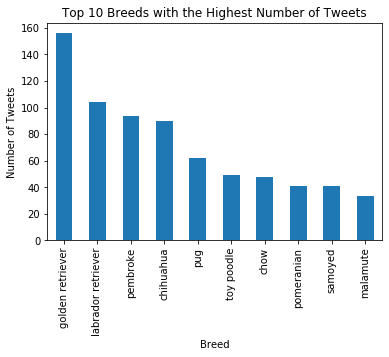

In [73]:
# plot top 10 breeds with highest tweets
twitter_archive_master.groupby('breed')['tweet_id'].count().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Top 10 Breeds with the Highest Number of Tweets')
plt.ylabel('Number of Tweets')
plt.xlabel('Breed')

The distribution of retweet count can be seen below of the top 10 highest number of tweeted breeds.

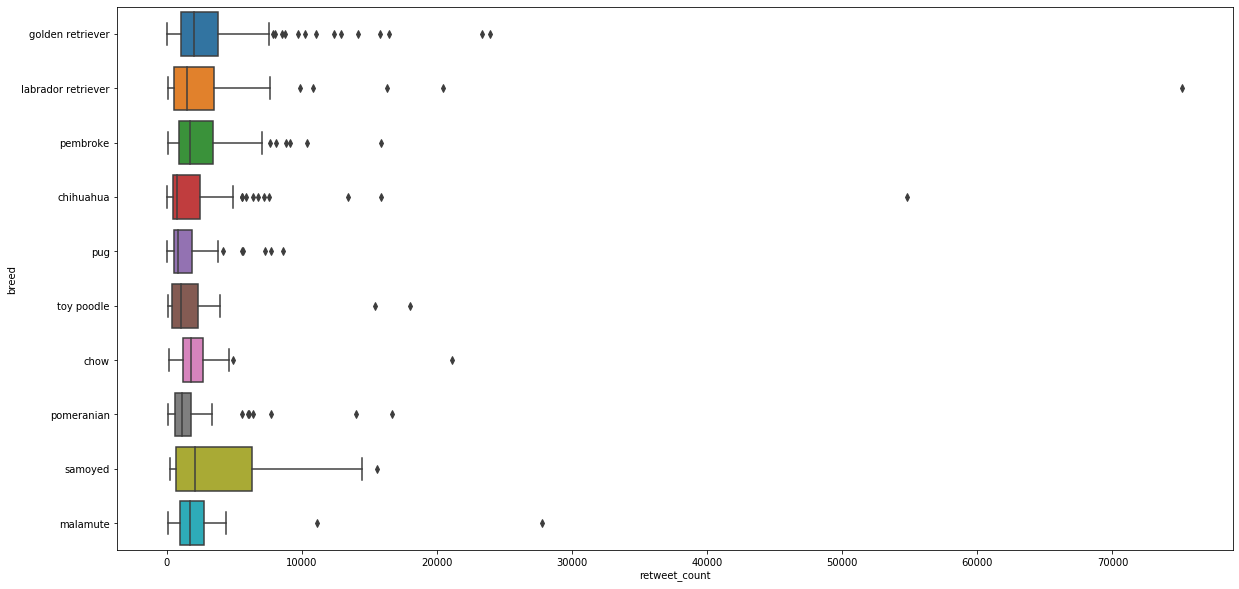

In [74]:
plt.figure(figsize=(20,10))

list2 = twitter_archive_master.groupby('breed')['tweet_id'].count().sort_values(ascending=False)[:10].index
sns.boxplot(y='breed', x='retweet_count', data=twitter_archive_master, order=list2)

#### 2. What is the most common dog name?

In [75]:
# most popular names
twitter_archive_master.groupby('name').size().sort_values(ascending=False)

name
Charlie    10
Cooper     10
Oliver     10
Penny       9
Lucy        9
           ..
Mary        1
Marvin      1
Marty       1
Marq        1
Kawhi       1
Length: 910, dtype: int64

Text(0.5, 0, 'Dog Name')

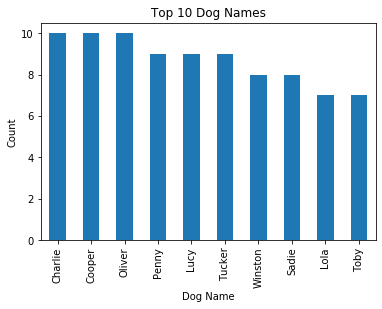

In [76]:
# plot the top 10 dog names
twitter_archive_master.groupby('name').size().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Top 10 Dog Names')
plt.ylabel('Count')
plt.xlabel('Dog Name')

Of 910 names, Charlie, Cooper and Oliver are the most popular dog names. 

#### 3. What are the most popular sources of tweets?

Text(0, 0.5, 'Number of Tweets')

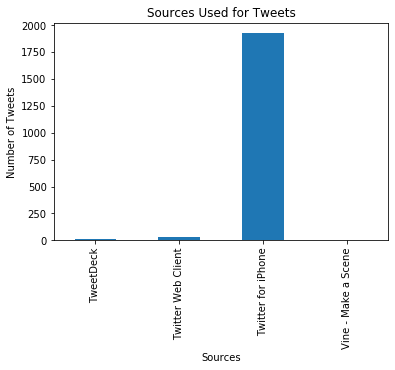

In [77]:
# most popular sources of tweets
twitter_archive_master.groupby('source').size().plot(kind='bar')
plt.title('Sources Used for Tweets')
plt.xlabel('Sources')
plt.ylabel('Number of Tweets')

Twitter being used on the iphone is the most popular source of tweets. Interestingly once the data has been cleaned 'Vine' is no longer being utilised.